In [3]:
#https://www.kaggle.com/sergiosaharovskiy/tps-nov-2021-a-complete-guide
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [4]:
import numpy as np # Linear algebra.
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv).

import seaborn as sns # Visualization.
import matplotlib.pyplot as plt # Visualization.

# Machine Learning block.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

print(f'\n[INFO] Libraries set up has been completed.')


[INFO] Libraries set up has been completed.


In [5]:
DATASET_PATH ="./dataset/"
train = pd.read_csv(DATASET_PATH + "train.csv")
test = pd.read_csv(DATASET_PATH + "test.csv")

In [6]:
train.isnull().sum()[train.isnull().sum() != 0 ]

Series([], dtype: int64)

In [7]:
train_df = train.drop(['id'],axis=1)
test_df = test.drop(['id'],axis=1)

In [8]:
seed = 322
train_df.sample(n=30000, random_state=seed)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
302398,0.000021,4.073070,117.42500,3.756700,0.065452,1.050720,3.834620,5.40726,4.698090,-0.041765,...,2.394000,0.027707,0.049009,0.125803,0.105230,2.290720,4.138780,-0.025209,0.090139,1
392830,0.045159,3.399050,4417.16000,2.169670,1.419720,1.339530,4.479100,4.64566,1.854660,-0.055619,...,0.800282,0.126122,0.016772,0.067717,0.079417,3.090140,0.900841,0.048793,0.067721,1
176693,0.570779,-0.068099,-8.21187,0.781223,0.104493,0.339191,5.142760,3.99444,0.307721,0.017088,...,3.247070,0.049349,0.089826,0.062972,0.116256,0.499373,3.132900,0.146997,0.043583,1
172507,-0.018860,5.015860,149.05100,-0.072401,0.100001,3.073120,5.838540,1.97600,2.444180,0.073912,...,2.527260,0.357020,0.017576,0.160286,0.017865,3.525500,4.795910,0.103591,0.021060,1
69596,0.511593,-0.564825,-91.46490,1.261570,0.100051,4.503390,0.931211,2.19689,1.296570,0.065197,...,3.355870,0.022992,0.082730,0.027390,0.001735,3.769440,4.051430,0.057840,1.217660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348424,-0.058940,0.868733,82.18290,2.123870,-0.052609,3.488480,4.797740,5.37629,5.398290,0.642914,...,2.105540,-0.021447,0.046987,0.020975,0.061087,2.351690,2.496700,0.669972,0.034009,0
379489,-0.010166,5.444040,4317.47000,1.291250,0.071004,0.002247,1.495210,2.17917,3.605480,0.070142,...,0.806557,-0.015971,0.129838,0.087421,0.038362,4.569240,2.419800,0.033195,0.088898,1
445901,1.669450,1.891290,107.17300,2.928880,0.064236,2.390170,1.421210,2.31083,1.649110,0.002973,...,4.062320,0.385816,0.034608,0.101765,0.126485,5.110380,-0.347221,-0.011045,0.048759,1
463643,0.320766,2.669570,95.78200,0.796932,0.080078,3.302940,1.881710,0.44214,4.100720,-0.053890,...,0.797500,0.087303,0.074889,0.040183,0.060855,3.053250,4.557800,0.028792,0.042618,0


In [9]:
X = train_df.drop('target', axis=1)
Y = train_df['target']


In [15]:
cols = ['f'+str(i) for i in range(100)]

In [36]:
X.isna().any().sum(), test_df.isna().any().sum()

(0, 0)

In [14]:
X.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.306508,2.497590,306.644536,2.647901,0.177850,2.556832,2.699650,2.571593,2.538273,0.134370,...,0.071252,2.444471,0.155260,0.059407,0.144932,0.106419,2.547853,2.590159,0.158881,0.123048
std,0.522450,1.554018,551.743893,1.544529,0.417488,1.562527,1.564000,1.549361,1.532988,0.421892,...,0.112654,1.542509,0.548397,0.119426,0.462015,0.209128,1.558427,1.525091,0.436190,0.264896
min,-3.797450,-1.223960,-1842.530000,-1.368560,-3.206210,-1.169770,-1.059310,-1.281970,-1.242020,-2.577840,...,-3.676990,-1.217700,-9.761770,-4.666240,-3.101500,-1.276540,-1.584740,-1.254730,-3.993500,-2.783380
25%,0.026222,1.186237,43.573400,1.442028,0.019709,1.261038,1.385820,1.333848,1.292163,0.019563,...,0.020496,1.214177,0.018904,0.024483,0.017055,0.025461,1.247888,1.348078,0.013536,0.018105
50%,0.097788,2.516500,133.626000,2.634130,0.061586,2.590425,2.801255,2.557985,2.475880,0.058752,...,0.054546,2.386845,0.068906,0.056649,0.063439,0.062151,2.601940,2.682090,0.058058,0.058471
75%,0.397184,3.787630,302.262250,3.907640,0.112712,3.813662,3.996913,3.823450,3.804360,0.101046,...,0.091619,3.693872,0.125165,0.088162,0.113114,0.102016,3.820665,3.839520,0.110718,0.104872
max,8.781500,6.226720,6119.280000,6.521150,8.265470,6.515070,6.586780,6.258770,6.389670,7.078460,...,6.482940,6.573890,18.412800,10.211800,8.623270,3.657220,6.254360,6.145300,10.767000,5.988110


In [42]:
train_df.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                     .head(15)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["mean",], color='green')\
                     .bar(subset=["max"], color='#BB0000')

,count,mean,std,min,25%,50%,75%,max
f2,600000.000000,306.644536,551.743893,-1842.530000,43.573400,133.626000,302.262250,6119.280000
f35,600000.000000,55.698848,130.132892,-397.004000,6.671687,21.222700,48.320200,1464.470000
f44,600000.000000,3.227368,5.414258,-42.443200,1.010547,2.556800,4.214082,131.565000
f84,600000.000000,0.501982,2.364291,-9.791940,-0.067392,0.122186,0.325540,45.224700
f36,600000.000000,1.769510,1.785712,-2.888940,0.308010,1.441415,2.714503,13.029000
f50,600000.000000,2.558957,1.611025,-1.489400,1.213650,2.509860,3.940270,6.223770
f25,600000.000000,2.580093,1.609573,-1.380430,1.238715,2.524685,3.962772,6.192880
f10,600000.000000,2.579987,1.604389,-1.309730,1.205920,2.527070,3.956182,6.508760
f17,600000.000000,2.483075,1.577456,-1.387720,1.132497,2.504525,3.775860,6.377910
f80,600000.000000,2.550175,1.576794,-1.142840,1.236540,2.544100,3.864593,6.388890


In [26]:
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
0,-0.382553,0.705772,-0.315075,0.347277,-0.229657,-0.875660,0.660314,-0.197064,-0.286162,-0.289270,...,-0.537157,-0.872508,-0.258806,-0.595537,-0.199502,-0.196145,1.067358,-0.400887,-0.167145,0.443374
1,-0.347377,-0.530387,-0.417061,0.472862,-0.187909,1.623543,-0.910506,-1.963980,1.309644,-0.229122,...,0.573313,0.658473,-0.252018,0.548089,0.019765,2.392938,-1.806811,-0.008064,-0.412110,-0.371198
2,-0.517136,-0.643571,-0.132486,-0.293650,-0.361533,0.364863,1.507175,0.824771,-0.480372,-0.183401,...,0.408845,1.580886,-0.127714,-0.226174,-0.062423,-0.516946,-1.968603,-0.294434,-0.078904,0.094984
3,-0.613619,-1.448884,0.857867,-0.490286,-0.409357,-0.656445,-0.001055,1.255833,1.281843,-0.025780,...,-0.768719,0.667692,-0.314304,-0.565262,-0.179472,-0.311897,-1.306572,-0.407556,-0.272505,-0.295118
4,-0.592913,0.783666,-0.272802,-0.323841,-0.382205,-0.293270,0.930480,-1.684456,0.543499,-0.237512,...,-0.510155,-0.346112,-0.361423,0.386926,-0.042986,-0.329511,-0.965117,-0.993613,-0.393636,-0.189697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-0.504355,-0.551500,1.937940,-1.010581,1.585028,-0.552446,0.731375,-0.944482,-0.673772,-0.371060,...,-0.219391,-0.578403,-0.136659,-0.349704,0.173589,-0.158944,1.211901,-0.557888,-0.251825,-0.216101
599996,-0.324356,1.498871,-0.736379,-1.076453,-0.335670,0.477988,-0.145691,2.175439,-1.084892,-0.341576,...,0.337680,-0.712645,-0.114522,0.188558,0.192870,-0.310986,0.850947,-0.472142,0.007868,-0.141134
599997,1.932651,-1.284110,-0.435725,-0.268614,-0.282193,0.778789,-0.028331,0.377122,-0.967558,-0.258913,...,0.407256,-0.170709,-0.223473,0.420855,-0.254249,-0.212734,-1.880861,-1.093736,-0.169690,-0.265813
599998,0.393168,0.855770,0.854070,-1.529262,0.819921,0.131849,-0.113459,-0.652033,-0.369953,0.776531,...,0.010571,-1.347007,-0.153752,0.100857,-0.396098,-0.323202,-1.713743,0.339410,-0.223636,-0.448741


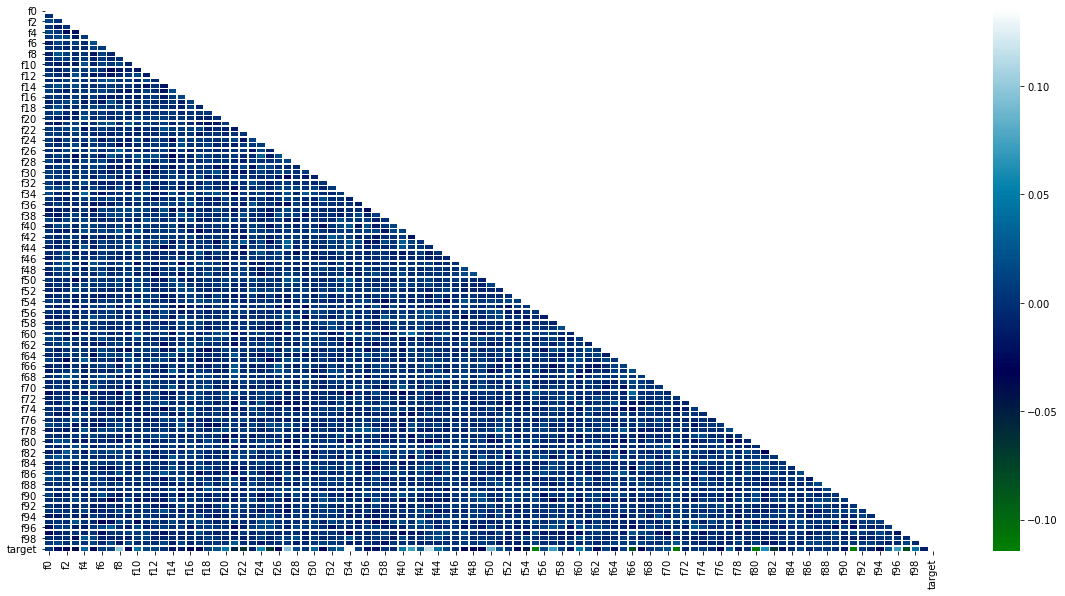

In [44]:
corr = train_df.sample(n=30000, random_state=33).corr()

fig, axes = plt.subplots(figsize=(20, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='ocean')

plt.show()

In [46]:
corr

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
f0,1.000000,-0.000392,0.014592,0.003539,0.013965,0.005778,-0.012243,0.000980,-0.009619,-0.006232,...,-0.003690,0.002250,0.001323,-0.015561,-0.003948,-0.022312,-0.024815,-0.002561,0.005729,0.003378
f1,-0.000392,1.000000,0.002174,-0.014260,0.004248,0.016528,0.012200,0.001704,0.024119,0.010396,...,0.003021,-0.006699,0.008527,-0.015777,0.003130,0.006910,-0.010245,-0.003352,0.013577,-0.023976
f2,0.014592,0.002174,1.000000,-0.001677,-0.024811,0.011399,0.001031,-0.006219,0.009111,0.007372,...,-0.001122,-0.004735,0.001333,0.001767,-0.001921,0.009489,-0.003468,0.000235,-0.001679,-0.026968
f3,0.003539,-0.014260,-0.001677,1.000000,-0.020891,-0.015837,0.009897,-0.000846,-0.002282,0.001884,...,0.014135,-0.005713,-0.002992,-0.009425,0.022152,-0.011824,0.005405,-0.022686,0.006350,-0.037715
f4,0.013965,0.004248,-0.024811,-0.020891,1.000000,0.007766,-0.003467,-0.002918,0.002870,0.005718,...,0.000680,0.002970,0.012209,-0.014258,0.001147,-0.013628,-0.006746,0.027371,0.002018,0.033226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f96,-0.022312,0.006910,0.009489,-0.011824,-0.013628,0.006628,0.014243,0.030450,-0.003702,-0.010449,...,-0.024864,0.002124,-0.009828,-0.002527,0.002588,1.000000,-0.016516,0.001498,-0.005442,0.071556
f97,-0.024815,-0.010245,-0.003468,0.005405,-0.006746,0.002666,-0.021859,0.001712,0.002324,0.008881,...,0.011910,0.004901,-0.001869,0.013721,-0.001351,-0.016516,1.000000,-0.005587,0.010423,-0.080370
f98,-0.002561,-0.003352,0.000235,-0.022686,0.027371,0.014370,-0.009098,-0.009609,-0.005012,-0.011634,...,-0.008294,-0.012533,-0.007782,0.000397,0.007250,0.001498,-0.005587,1.000000,-0.003588,0.042396
f99,0.005729,0.013577,-0.001679,0.006350,0.002018,0.012891,-0.004151,0.015095,-0.015991,0.012982,...,0.003057,0.005058,0.009570,0.001676,-0.008359,-0.005442,0.010423,-0.003588,1.000000,-0.012718


In [48]:
agg_features = ['sum', 'mean']

for ft in agg_features:
    class_method = getattr(pd.DataFrame,ft)
    print(class_method(X.sample(n=10),axis=1))

84535     21.274306
83262    -19.199113
117486    -7.783668
509610   -14.540281
417014     7.805734
478175     5.005124
211321   -14.539816
134130    -4.635989
411479     6.916216
338049   -13.831247
dtype: float64
279402   -0.105924
361313    0.095599
147169    0.115783
43785    -0.040885
204888   -0.056920
320199   -0.080152
377696   -0.027634
262485   -0.077825
281728    0.018643
468533   -0.104478
dtype: float64


In [ ]:
from pandas_profiling import ProfileReport
pp = ProfileReport(X, title='EDA', progress_bar=False)
pp

In [ ]:
best_lgbm

In [19]:
import gc 
gc.collect()
#!stop here

168

In [ ]:
sub = pd.read_csv(DATASET_PATH+'/sample_submission.csv')
sub['target'] = preds
sub.to_csv('submission4.csv',index=False)
sub

In [ ]:
lgbm_clf_prediction = lgbm_clf.predict(test_df)

In [ ]:
submission_lgbm_clf = pd.DataFrame({'id':test['id'], 'target':lgbm_clf_prediction})
submission_lgbm_clf.head()

In [ ]:
submission_lgbm_clf.to_csv("./submission3.csv",index=False)